In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

folder_path = '/content/drive/MyDrive/Lexicology/Lexicology'  # Replace with your path

if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    for file in files:
        print(file)
else:
    print("Folder not found")


In [ ]:
paths=[]
for file in files:
 full_file_paths = os.path.join(folder_path, file)
 print(full_file_paths)
 paths.append(full_file_paths)


In [ ]:
print(paths)

In [ ]:
file_contents = {}

for f in paths:
    try:
        with open(f, 'r') as file:
            content = file.read()
            # Use the file path or a custom key as the dictionary key
            file_name = os.path.basename(f)
            file_contents[file_name] = content
    except FileNotFoundError:
        print(f"File not found: {f}")

print(file_contents)


In [ ]:
extracted_lines = {}

for file_name, content in file_contents.items():
    lines = content.split('\n')
    # Initialize a list to store all '*CHI:' lines for this file
    chi_lines = []
    # Iterate through the lines
    for line in lines:
        if line.startswith('*CHI:'):
            # Extract the line starting with '*CHI:' and add it to the list
            chi_lines.append(line[6:].strip().replace("'", ""))
    # Store the accumulated lines in the dictionary
    extracted_lines[file_name] = chi_lines

print(extracted_lines)


In [ ]:
import re

def remove_enclosed_phrases(line):
    line = re.sub(r'<[^>]*>', '', line)
    line = re.sub(r'\[[^\]]*\]', '', line)
    return line

# Initialize a dictionary to store the cleaned phrases for each file
cleaned_phrases = {}

# Define a regular expression pattern to match words or letters
pattern = r'[a-zA-Z]+'

# Iterate through each file and its lines in the extracted_lines dictionary
for file_name, lines in extracted_lines.items():
    # Initialize a list to store cleaned lines for this file
    file_cleaned_lines = []

    for line in lines:
        line = remove_enclosed_phrases(line)
        # Extract phrases using the regular expression pattern
        phrases = re.findall(pattern, line)

        # Join the extracted phrases to form a cleaned line
        cleaned_line = ' '.join(phrases)

        if cleaned_line:
            file_cleaned_lines.append(cleaned_line)

    # Store the cleaned lines for this file in the cleaned_phrases dictionary
    cleaned_phrases[file_name] = file_cleaned_lines

# Print the cleaned phrases for each file
for file_name, phrases in cleaned_phrases.items():
    print(f"{file_name}:")
    for phrase in phrases:
        print(phrase)
    print()  # Print a newline for better readability between files



In [ ]:
print(cleaned_phrases)

In [ ]:
import nltk
nltk.download('punkt')

# Initialize a dictionary to store the tokenized phrases for each file
tokenized = {}

# Iterate through each file and its list of cleaned phrases
for file_name, phrases in cleaned_phrases.items():
    # Initialize a list to store all tokens for this file
    file_all_tokens = []

    for phrase in phrases:
        # Tokenize the phrase
        tokens = nltk.word_tokenize(phrase)

        # Extend the file's token list with these tokens
        file_all_tokens.extend(tokens)

    # Store the complete list of tokens for this file in the tokenized dictionary
    tokenized[file_name] = file_all_tokens

# Print the complete list of tokens for each file
for file_name, tokens in tokenized.items():
    print(f"{file_name}:")
    print(tokens)
    print()  # Print a newline for better readability between files




In [ ]:
# overall count of tokens
overall_token_count = 0

for file_name, tokens in tokenized.items():
    # Update the overall count with the length of the tokens list for this file
    overall_token_count += len(tokens)

print("number of tokens:", overall_token_count)

In [ ]:
!pip install langdetect
import nltk
from nltk.corpus import words
nltk.download('words')
from langdetect import detect

# Get a set of lowercase English words for fast lookup
english_vocab = set(words.words())

# Initialize a dictionary to store the filtered tokens
filtered_tokenized = {}

# Iterate over the tokenized data
for file_name, tokens in tokenized.items():
    # Filter out non-English words using language detection
    filtered_tokens = [token for token in tokens if detect(token) == 'en' and token.lower() in english_vocab]

    # Store the filtered tokens
    filtered_tokenized[file_name] = filtered_tokens

# Print the filtered tokens for each file
for file_name, tokens in filtered_tokenized.items():
    print(f"{file_name}:")
    print(tokens)
    print()  # Print a newline for better readability between files


In [ ]:
import pandas as pd
import nltk
from collections import Counter

'''This part of the code is a sample of how to obtain a table for ANOVA calculation, however, it has to be merged with the table
for the second language'''

# Make sure to download the necessary NLTK package for POS tagging
nltk.download('averaged_perceptron_tagger')


# DataFrame to store the results
pug = pd.DataFrame(columns=['Age Group', 'Language Group', 'Number of Nouns'])

for file_name, words in filtered_tokenized.items():
    # Parsing file names to extract age and language group
    age_group = file_name.split("_")[0][:2]
    language_group = 'Cantonese'

    # Tag tokens with POS tags
    tagged_tokens = nltk.pos_tag(words)

    # Filter for nouns (NN: singular noun, NNS: plural noun)
    nouns = [word for word, tag in tagged_tokens if tag in ['PRP$', 'PRP']]

    # Count the number of nouns
    num_nouns = len(nouns)

    # Append to DataFrame
    pug = pug.append({'Age Group': age_group, 'Language Group': language_group, 'Number of Nouns': num_nouns}, ignore_index=True)

# Display the DataFrame
print(pug)


In [ ]:
# Sample dictionary
# tokenized = {'01_File1': [tokens...], '01_File2': [tokens...], '02_File1': [tokens...], ...}

# Initialize a dictionary for merged results
merged_tokenized = {}

# Iterate through the original dictionary
for key, tokens in filtered_tokenized.items():
    # Determine the prefix (first two numbers of the key)
    prefix = key[:2]

    # If the prefix is not in the merged dictionary, initialize it with an empty list
    if prefix not in merged_tokenized:
        merged_tokenized[prefix] = []

    # Extend the list associated with the prefix with the current tokens
    merged_tokenized[prefix].extend(tokens)

# Print the merged results
for prefix, merged_tokens in merged_tokenized.items():
      print(f"{prefix}:")
      print(merged_tokens)
      print()  # Print a newline for better readability


In [ ]:
# Define the specific token you want to remove
token_to_remove = 'xxx'

# Assuming 'merged_tokenized' is your dictionary
# merged_tokenized = {'01': [list of tokens], '02': [list of tokens], ...}

# Iterate over each key-value pair in the dictionary
for key in merged_tokenized:
    # Filter out the specific token from the list of tokens
    merged_tokenized[key] = [token for token in merged_tokenized[key] if token != token_to_remove]

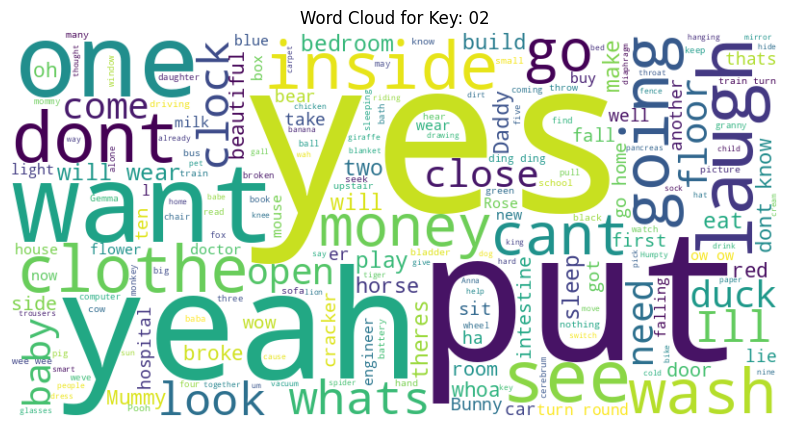

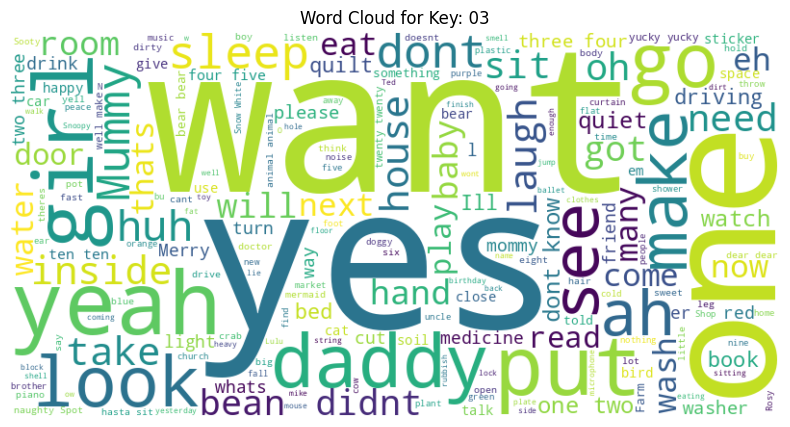

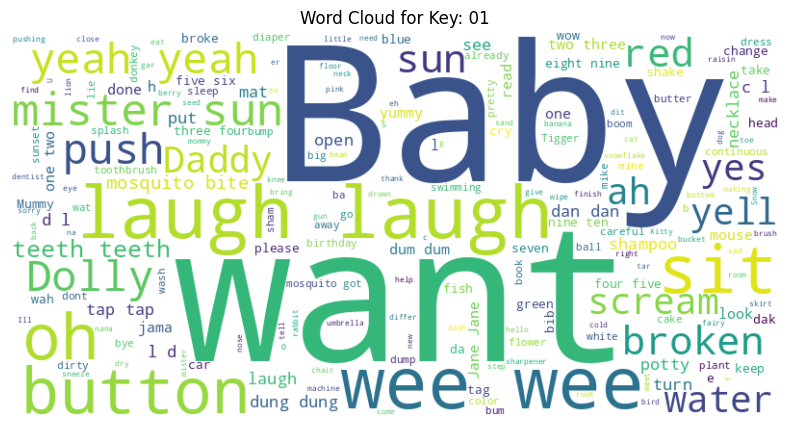

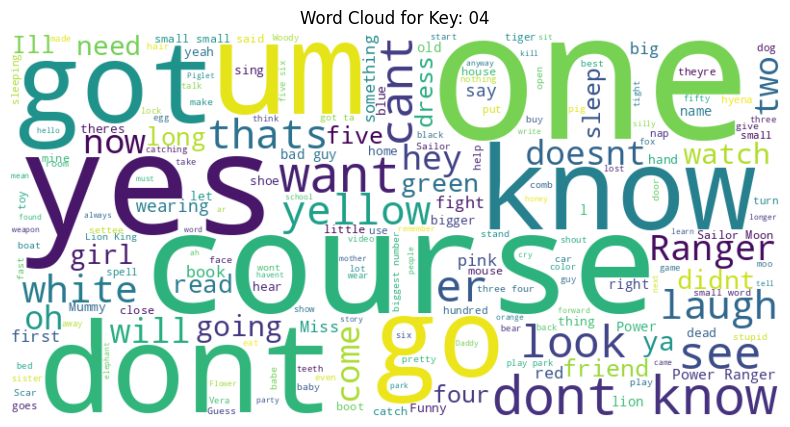

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'merged_tokenized' is your dictionary with keys and list of tokens
# merged_tokenized = {'01': [list of tokens], '02': [list of tokens], ...}

for key, tokens in merged_tokenized.items():
    # Join the tokens into a single string
    text = ' '.join(tokens)

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Key: {key}")
    plt.axis('off')
    plt.show()


In [ ]:
nltk.download('averaged_perceptron_tagger')


In [ ]:
import nltk
from collections import Counter

# Assuming 'merged_tokenized' is your dictionary
# merged_tokenized = {'01': [list of tokens], '02': [list of tokens], ...}

for key, tokens in merged_tokenized.items():
    # Tag tokens with POS tags
    tagged_tokens = nltk.pos_tag(tokens)

    # Extract just the POS tags
    pos_tags = [tag for word, tag in tagged_tokens]

    # Count the frequency of each POS tag
    pos_freq = Counter(pos_tags)

    # Display the most common POS tags for this key
    print(f"Most Common POS Tags for Key: {key}")
    for pos, freq in pos_freq.most_common(10):  # Adjust number as needed
        print(f"{pos}: {freq}")
    print()  # Print a newline for better readability


In [ ]:
from collections import Counter

# Assuming 'merged_tokenized' is your dictionary
# merged_tokenized = {'01': [list of tokens], '02': [list of tokens], ...}

for key, tokens in merged_tokenized.items():
    # Count the frequency of each token
    token_freq = Counter(tokens)

    # Display the most common tokens for this key
    print(f"Most Common Tokens for Key: {key}")
    for token, freq in token_freq.most_common(100):  # Adjust number as needed
        print(f"{token}: {freq}")
    print()  # Print a newline for better readability


In [ ]:
# Initialize a dictionary to store the count of unique words for each key
unique_word_counts = {}

for key, tokens in merged_tokenized.items():
    # Convert the list of tokens to a set to remove duplicates and count the unique words
    unique_word_counts[key] = len(set(tokens))

# Print the count of unique words for each key
for key, count in unique_word_counts.items():
    print(f"Key {key} has {count} unique words.")
